<a href="https://colab.research.google.com/github/RMoulla/IYT_Lille/blob/main/Copie_de_TP_Final_Seloger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Travaux pratiques : analyse des prix des biens immobiliers.

Analyse d'un jeu de données comportant des informations immobilières provenant du site seloger.com.



In [1]:
# Librairie pour lire des fichiers de données tabulaires
import pandas as pd

In [2]:
# Pour afficher l'ensemble des colonnes
pd.set_option("display.max_columns", 25)
dataset = pd.read_csv('selogerdata.csv')

In [3]:
# Vérifier la taille de la table
dataset.shape

(8899, 24)

Le jeu de données contient 8899 lignes et 24 colonnes.

In [4]:
# Visualiser les 5 premières lignes du dataset
dataset.head()

,number,codeinsee,codepostal,cp,etage,idagence,idannonce,idtiers,idtypechauffage,idtypecommerce,idtypecuisine,idtypepublicationsourcecouplage,naturebien,nb_chambres,nb_photos,nb_pieces,position,prix,si_balcon,si_sdEau,si_sdbain,surface,typedebien,ville
0,11,750116,75016,75016,0,178817,144013899,227883,0,0,√©quip√©e,SL,1,2,13,3,11,59000,1,0,0,69.00,Appartement,Paris 16√®me
1,8,750110,75010,75010,0,12089,149750677,3765,0,0,aucune,SL,1,2,7,1,8,77500,0,0,0,8.49,Appartement,Paris 10√®me
2,6,750118,75018,75018,0,115811,138648733,108873,0,0,aucune,SL,1,1,8,2,6,94000,0,0,0,37.00,Appartement,Paris 18√®me
3,16,750110,75010,75010,0,12089,149750679,3765,0,0,aucune,SL,1,2,4,1,16,96000,0,0,0,10.26,Appartement,Paris 10√®me
4,4,750116,75016,75016,0,97567,147153067,145098,0,0,0,SL,1,1,5,2,4,100000,0,0,0,14.93,Appartement,Paris 16√®me


In [5]:
dataset.describe()

,number,codeinsee,codepostal,cp,etage,idagence,idannonce,idtiers,idtypechauffage,idtypecommerce,naturebien,nb_chambres,nb_photos,nb_pieces,position,prix,si_balcon,si_sdEau,si_sdbain,surface
count,8899.000000,8899.000000,8899.000000,8899.000000,8899.0,8899.000000,8.899000e+03,8899.000000,8899.0,8899.0,8899.000000,8899.000000,8899.000000,8899.000000,8899.000000,8.899000e+03,8899.000000,8899.0,8899.0,8899.000000
mean,9.531296,751745.680189,75186.144735,75186.144735,0.0,124110.094280,1.473531e+08,136989.252500,0.0,0.0,1.638723,2.319474,9.697269,3.838746,9.531296,1.210579e+06,0.271716,0.0,0.0,96.070707
std,5.765614,16287.896954,1660.091189,1660.091189,0.0,104338.907661,3.661055e+06,109732.960794,0.0,0.0,0.931184,1.170877,4.511174,1.483164,5.765614,4.462923e+05,0.444869,0.0,0.0,38.127731
min,0.000000,750101.000000,75001.000000,75001.000000,0.0,33.000000,7.437284e+07,98.000000,0.0,0.0,1.000000,1.000000,0.000000,1.000000,0.000000,5.900000e+04,0.000000,0.0,0.0,0.000000
25%,5.000000,750108.000000,75008.000000,75008.000000,0.0,39738.000000,1.463174e+08,26516.000000,0.0,0.0,1.000000,1.000000,6.000000,3.000000,5.000000,7.950000e+05,0.000000,0.0,0.0,66.400000
50%,10.000000,750114.000000,75014.000000,75014.000000,0.0,93920.000000,1.486361e+08,123925.000000,0.0,0.0,1.000000,2.000000,9.000000,4.000000,10.000000,1.475000e+06,0.000000,0.0,0.0,93.000000
75%,15.000000,750116.000000,75017.000000,75017.000000,0.0,203657.000000,1.495161e+08,213489.000000,0.0,0.0,3.000000,3.000000,12.000000,5.000000,15.000000,1.490000e+06,1.000000,0.0,0.0,129.000000
max,19.000000,950500.000000,95880.000000,95880.000000,0.0,362103.000000,1.502498e+08,425123.000000,0.0,0.0,3.000000,22.000000,27.000000,53.000000,19.000000,2.000000e+06,1.000000,0.0,0.0,250.000000


Ce résumé statistique comporte déjà plusieurs enseignements :

* Les colonnes `etage`, `idtypechauffage`, `idtypecommerce`, `si_sdEau`,	`si_sdbain` ne comportent que des valeurs nulles. Elles n'apportent donc aucune information pour expliquer ou prédire le prix.

* Le jeu de données contient des outliers : on peut par exemple noter que le maximum du nombre de pièces est 53. De même le maximum du nombre de chambre est 22. Par ailleurs le minimum de la surface est 0.


In [6]:
# Afficher les noms des colonnes
dataset.columns

Index(['number', 'codeinsee', 'codepostal', 'cp', 'etage', 'idagence',
       'idannonce', 'idtiers', 'idtypechauffage', 'idtypecommerce',
       'idtypecuisine', 'idtypepublicationsourcecouplage', 'naturebien',
       'nb_chambres', 'nb_photos', 'nb_pieces', 'position', 'prix',
       'si_balcon', 'si_sdEau', 'si_sdbain', 'surface', 'typedebien', 'ville'],
      dtype='object')

In [7]:
# Accéder à une colonne
dataset["ville"][1:3]

,ville
1,Paris 10√®me
2,Paris 18√®me


In [8]:
# Accéder à une ligne et une colonne en fonction de l'index et du nom de la colonne
dataset.loc[1, "ville"]

'Paris 10√®me'

In [9]:
# Accéder à une ligne et une colonne avec les indices
dataset.iloc[1,1]

np.int64(750110)

## Nettoyage des données

In [10]:
# Vérifier s'il y a des valeurs manquantes
dataset.isna().sum()

,0
number,0
codeinsee,0
codepostal,0
cp,0
etage,0
idagence,0
idannonce,0
idtiers,0
idtypechauffage,0
idtypecommerce,0


In [11]:
# sélectionner la ligne qui correspond au bien ayant 53 pièces
dataset[dataset['nb_pieces'] == 53]

,number,codeinsee,codepostal,cp,etage,idagence,idannonce,idtiers,idtypechauffage,idtypecommerce,idtypecuisine,idtypepublicationsourcecouplage,naturebien,nb_chambres,nb_photos,nb_pieces,position,prix,si_balcon,si_sdEau,si_sdbain,surface,typedebien,ville
1318,18,750118,75018,75018,0,228375,149412073,261580,0,0,aucune,SL,1,2,12,53,18,580000,0,0,0,53.0,Appartement,Paris 18√®me


In [12]:
# Sélectionner la ligne qui correspond au bien ayant 22 chambres

dataset[dataset['nb_chambres'] == 22]

,number,codeinsee,codepostal,cp,etage,idagence,idannonce,idtiers,idtypechauffage,idtypecommerce,idtypecuisine,idtypepublicationsourcecouplage,naturebien,nb_chambres,nb_photos,nb_pieces,position,prix,si_balcon,si_sdEau,si_sdbain,surface,typedebien,ville
1236,0,750115,75015,75015,0,260996,146819689,282708,0,0,√©quip√©e,SL,1,22,4,3,0,567000,0,0,0,77.0,Appartement,Paris 15√®me


In [13]:
# Sélectionner la ligne qui correspond au bien dont la surface est nulle

dataset[dataset['surface'] == 0]

,number,codeinsee,codepostal,cp,etage,idagence,idannonce,idtiers,idtypechauffage,idtypecommerce,idtypecuisine,idtypepublicationsourcecouplage,naturebien,nb_chambres,nb_photos,nb_pieces,position,prix,si_balcon,si_sdEau,si_sdbain,surface,typedebien,ville
2030,3,750116,75016,75016,0,76979,147347131,108380,0,0,0,SL,1,1,6,4,3,747840,0,0,0,0.0,Appartement,Paris 16√®me


In [14]:
# Supprimer les lignes aberrantes

dataset.drop([1236, 1318, 2030], axis = 0, inplace = True)

Certaines colonnes semblent rendondantes à première vue. Nous allons vérifier si c'est bien le cas.

In [15]:
# Vérfier si les colonnes cp et codepostal sont identiques
dataset['cp'].equals(dataset['codepostal'])

True

In [16]:
# Varfier si les deux colonnes position et number sont identiques
dataset['position'].equals(dataset['number'])

True

In [17]:
# Combien de valeurs uniques possède chaque colonne ?
dataset.nunique().sort_values()

,0
etage,1
idtypechauffage,1
idtypecommerce,1
si_sdEau,1
si_sdbain,1
typedebien,2
si_balcon,2
idtypepublicationsourcecouplage,3
naturebien,3
nb_chambres,6


* Les variables `si_sdbain`, `si_sdEau`, `etage`, `idtypechauffage`, `idtypecommerce` ne comportent qu'une unique valeur, comme nous venons de le voir plus haut.
* `cp` et `codepostal` semblent se référer à la même variable. Par ailleurs, `codeinsee` et `ville` ont l'air de vehiculer plus ou moins la même information. En première approximation nous ne garderons qu'une seule de ces 4 variables.

* Les variables `position` et `number` ont le même nombre de modalités.

* Plus important peut-être, il y a 3815 modalités pour `idannonce` (annonces différentes) alors que le jeu de données contient 8899 lignes. On peut soupçonner ici la présence de doublons.

* Les variables `idagence` et`idtiers` ont le même nombre de modalités, très élevé. Il y a 1413 modalités pour chacune des variables alors qu'il n'y a potentiellement que 3815 annonces uniques, soit un peu plus de deux annonces par modalité de `idagence`.

Regardons ce dernier point plus en détails.



In [18]:
# Liste des variables à supprimer
to_remove = [
    'si_sdbain', 'si_sdEau', 'etage',
    'idtypechauffage', 'idtypecommerce', 'codepostal',
    'number', 'idtiers', 'cp', 'codeinsee', 'idannonce', 'idagence']

# Supprimer les colonnes listée dans to_remove
dataset.drop(to_remove, axis = 1, inplace = True)
dataset.shape

(8896, 12)

In [19]:
# Vérifier s'il y a des doublons dans les lignes
dataset.duplicated().any()

np.True_

In [20]:
# Compter le nombre de doublons
dataset.duplicated().sum()

np.int64(5063)

In [21]:
# Supprimer les doublons
dataset = dataset.drop_duplicates()
dataset.shape

(3833, 12)

Les caractères accentués de certaines modalités sont mal rendus. Nous allons les corriger.

In [22]:
# Afficher les modalités de la variable idtypecuisine
dataset['idtypecuisine'].unique()

array(['√©quip√©e', 'aucune', '0', 'coin cuisine √©quip√©',
       'coin cuisine', 's√©par√©e', 's√©par√©e √©quip√©e', 'am√©ricaine',
       'am√©ricaine √©quip√©e', '-1'], dtype=object)

In [23]:
# Correction des modalités de la variable idtypecuisine
def clean_cuisine(x):

    # 1. gérer les codes numériques
    if x == "0":
        return "categorie_0"
    if x == "-1":
        return "categorie_1"

    # remplacer les artefacts des "é"
    x = x.replace("√©", "é")
    x = x.strip()
    return x


In [24]:
# Appliquer à la colonne idtypecuisine
dataset["idtypecuisine"] = dataset["idtypecuisine"].apply(clean_cuisine)
dataset["idtypecuisine"].unique()

array(['équipée', 'aucune', 'categorie_0', 'coin cuisine équipé',
       'coin cuisine', 'séparée', 'séparée équipée', 'américaine',
       'américaine équipée', 'categorie_1'], dtype=object)

Nous allons également corriger les caractères accentués pour la variable ville.

In [25]:
dataset['ville'].unique()

array(['Paris 16√®me', 'Paris 10√®me', 'Paris 18√®me', 'Melun',
       'Corbeil Essonnes', '√âtampes', 'Issou', 'Limay', '√âvry', 'Avon',
       'Evry', 'Saint-Denis', 'Trappes', 'Ris Orangis', 'Paris 19√®me',
       'Paris 14√®me', '√âpinay-sous-S√©nart', 'Eragny sur Oise',
       'Argenteuil', 'Bessancourt', 'Etampes', 'Montlhery', 'Gagny',
       'Fleury Merogis', 'Villeparisis', 'Fosses', 'Vaujours', 'Les Ulis',
       'Meaux', 'Pontoise', 'Cergy', 'Verneuil sur Seine',
       'Brie Comte Robert', 'Carrieres sous Poissy', 'H√©ricy', 'Igny',
       'Paris 20√®me', 'Les Pavillons-sous-Bois', 'Mennecy',
       'Vert le Petit', 'Morsang-sur-Orge', 'Linas', 'Mandres les Roses',
       'Paris 17√®me', 'Villepinte', 'Paris 2√®me', 'Paris 15√®me',
       'Paris 6√®me', 'Paris 3√®me', 'Paris 8√®me', 'Paris 5√®me',
       'Paris 11√®me', 'Paris 9√®me', 'Paris 13√®me', 'Paris 12√®me',
       'Garches', 'Chatou', 'Sucy en Brie', 'Louveciennes', 'Le Pecq',
       'Enghien les Bains', 'Saint Ger

In [26]:
# Corriger les accents
dataset['ville'] =  (
    dataset['ville']
    .str.replace('√®', 'è')
    .str.replace('√â', 'É')
    .str.replace('√©', 'é')
    .str.replace('√¨', 'ê')
)

In [27]:
dataset['ville'].unique()

array(['Paris 16ème', 'Paris 10ème', 'Paris 18ème', 'Melun',
       'Corbeil Essonnes', 'Étampes', 'Issou', 'Limay', 'Évry', 'Avon',
       'Evry', 'Saint-Denis', 'Trappes', 'Ris Orangis', 'Paris 19ème',
       'Paris 14ème', 'Épinay-sous-Sénart', 'Eragny sur Oise',
       'Argenteuil', 'Bessancourt', 'Etampes', 'Montlhery', 'Gagny',
       'Fleury Merogis', 'Villeparisis', 'Fosses', 'Vaujours', 'Les Ulis',
       'Meaux', 'Pontoise', 'Cergy', 'Verneuil sur Seine',
       'Brie Comte Robert', 'Carrieres sous Poissy', 'Héricy', 'Igny',
       'Paris 20ème', 'Les Pavillons-sous-Bois', 'Mennecy',
       'Vert le Petit', 'Morsang-sur-Orge', 'Linas', 'Mandres les Roses',
       'Paris 17ème', 'Villepinte', 'Paris 2ème', 'Paris 15ème',
       'Paris 6ème', 'Paris 3ème', 'Paris 8ème', 'Paris 5ème',
       'Paris 11ème', 'Paris 9ème', 'Paris 13ème', 'Paris 12ème',
       'Garches', 'Chatou', 'Sucy en Brie', 'Louveciennes', 'Le Pecq',
       'Enghien les Bains', 'Saint Germain en Laye', 'Paris 

In [28]:
dataset.duplicated().any()

np.False_

## Analyse exploratoire des données




Dans ce qui suit, nous allons analyser les distributions des variables ainsi que les corrélations entre les différentes variables explicatives avec la variable `prix`. Nous allons utiliser ici les deux packages de visualisation en Python `matplotlib` et `seaborn`.

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

Commençons d'abord par regarder la distribution de la variable d'intérêt `prix`.


<Axes: xlabel='prix', ylabel='Density'>

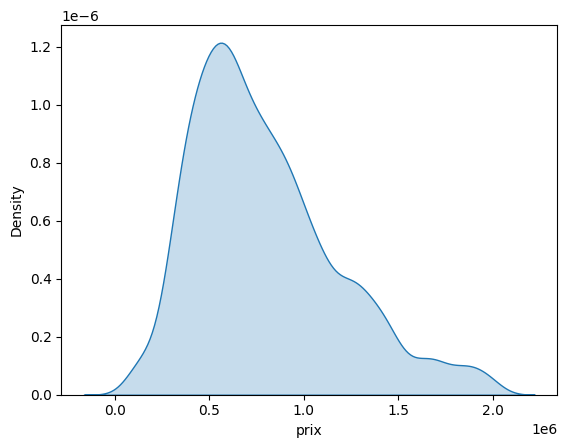

In [30]:
# densité de la variable prix sous forme de distribution

sns.kdeplot(data = dataset, x = 'prix', fill=True)

### Variables explicatives quantitatives

<Axes: xlabel='surface', ylabel='prix'>

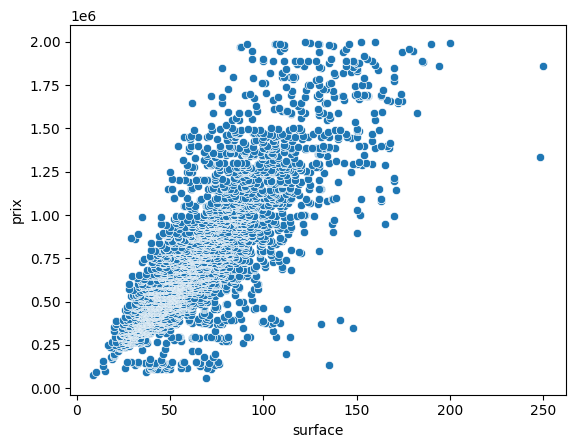

In [31]:
# Visualiser le prix en fonction de la surface

sns.scatterplot(data=dataset, x='surface', y='prix')

<Axes: xlabel='nb_chambres', ylabel='prix'>

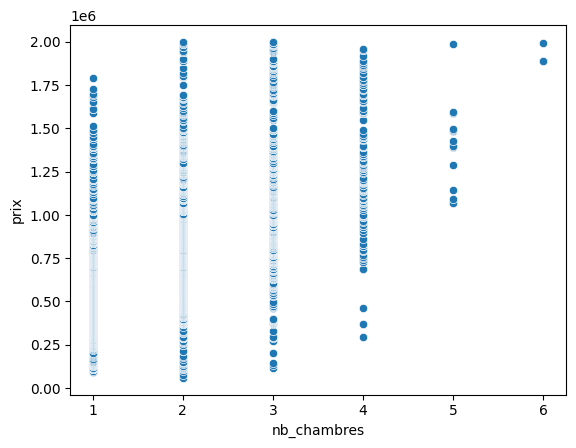

In [32]:
# Visualiser le prix en fonction du nombre de chambres
sns.scatterplot(data=dataset, x='nb_chambres', y='prix')

<Axes: xlabel='nb_chambres', ylabel='prix'>

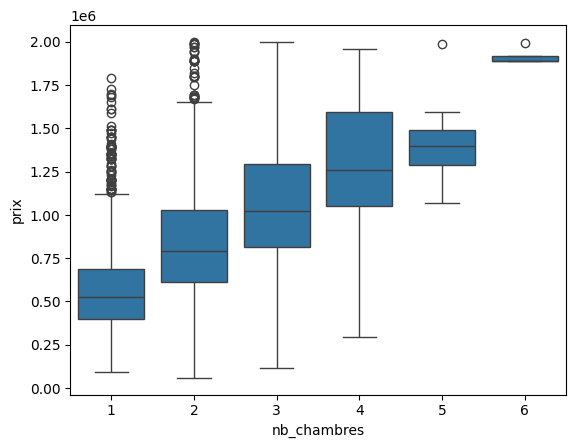

In [33]:
# Visualiser le prix en fonction du nombre de chambres en boxplots
sns.boxplot(data=dataset, x='nb_chambres', y='prix')

<Axes: xlabel='nb_pieces', ylabel='prix'>

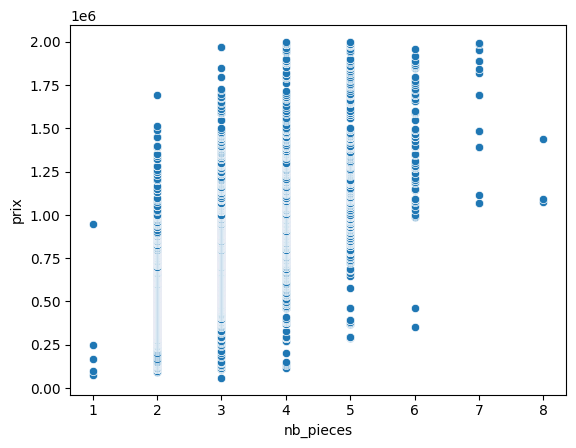

In [34]:
# Visualiser le prix en fonction du nombre de pièces
sns.scatterplot(data=dataset, x='nb_pieces', y='prix')

<Axes: xlabel='nb_photos', ylabel='prix'>

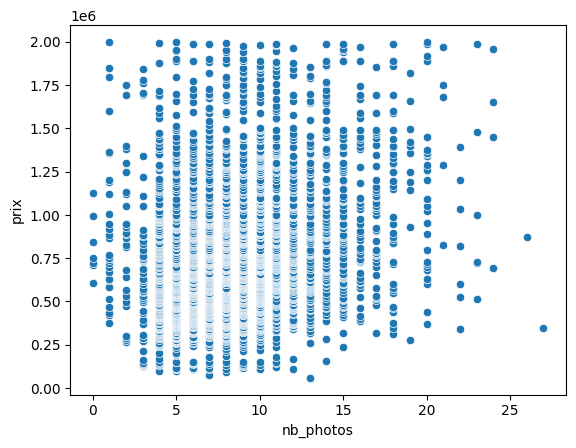

In [35]:
# Visualiser le prix en fonction du nombre de photos
sns.scatterplot(data=dataset, x='nb_photos', y='prix')

### Variables explicatives catégorielles

<Axes: xlabel='prix', ylabel='Density'>

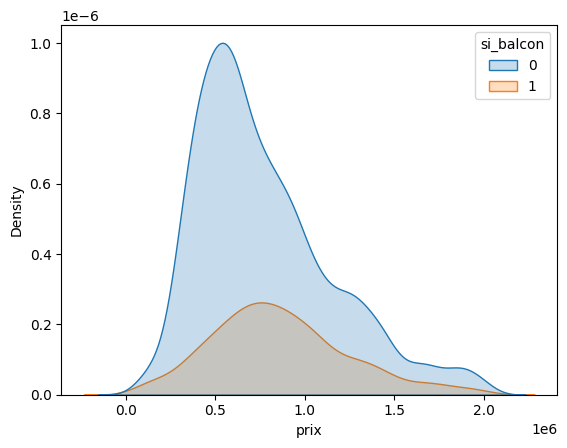

In [36]:
# densité de la variable prix en fonction de si_balcon sous forme de disribution

sns.kdeplot(data = dataset, x = 'prix', hue='si_balcon', fill=True)

<Axes: xlabel='si_balcon', ylabel='prix'>

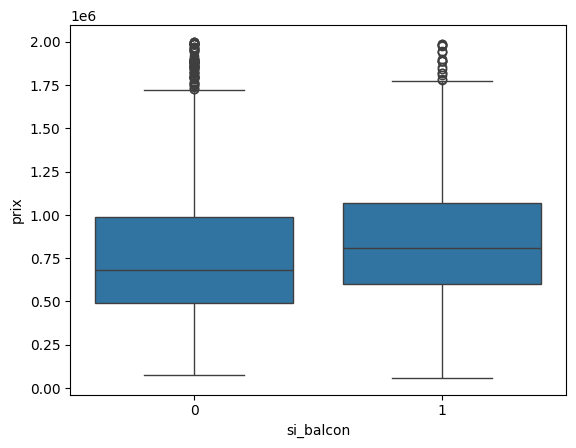

In [37]:
# Visualiser le prix en fonction de si_balcon en boxplot

sns.boxplot(data=dataset, x='si_balcon', y='prix')

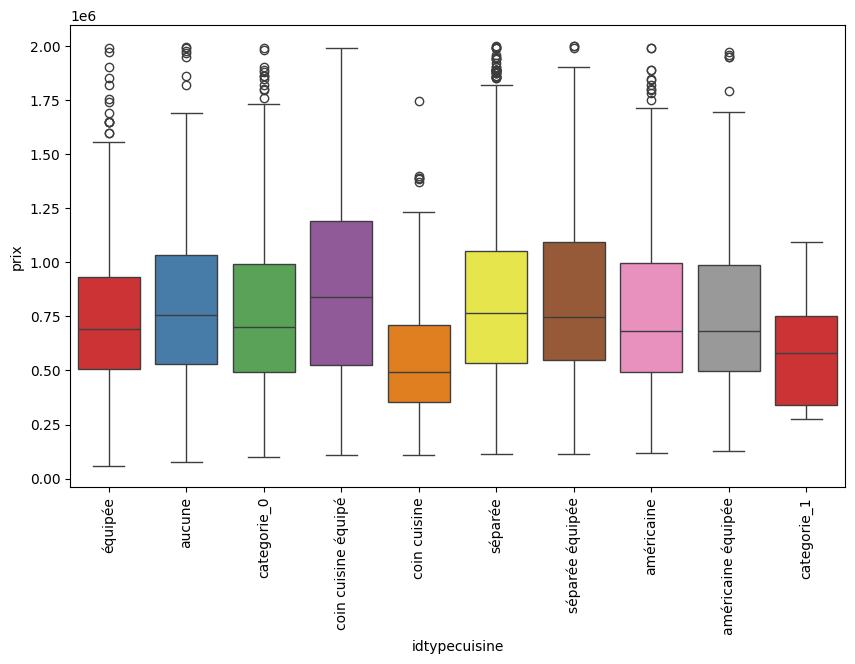

In [38]:
# Visualiser le prix en fonction de idtypecuisine
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(y=dataset['prix'], x=dataset['idtypecuisine'], hue=dataset['idtypecuisine'], ax=ax, palette='Set1', legend=False)
ax.tick_params(axis='x', rotation=90)
plt.show()

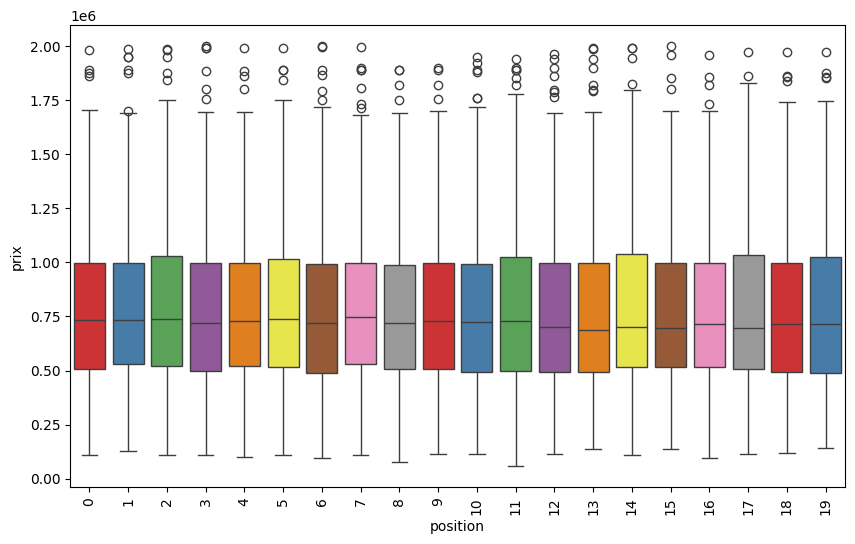

In [39]:

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(y=dataset['prix'], x=dataset['position'], hue=dataset['position'], ax=ax, palette='Set1', legend=False)
ax.tick_params(axis='x', rotation=90)
plt.show()

Regardons maintenant les variables catégorielles ayant un nombre imortant de modalités. Commençons par la variable `ville`.

In [40]:
# Afficher le nombre de modalités de la variable ville
dataset['ville'].nunique()

112

In [41]:
# Répartition des observations sur les modalités
dataset['ville'].value_counts()

,count
ville,
Paris 16ème,443
Paris 18ème,308
Paris 15ème,299
Paris 17ème,294
Paris 13ème,278
...,...
St Germain en Laye,1
Meudon,1
Neuilly-sur-Seine,1


In [42]:
dataset.loc[~dataset['ville'].str.startswith('Paris '), 'ville'] = 'Banlieue'
dataset['ville'].value_counts()

,count
ville,
Paris 16ème,443
Paris 18ème,308
Paris 15ème,299
Paris 17ème,294
Paris 13ème,278
Paris 19ème,212
Paris 11ème,195
Paris 20ème,194
Paris 14ème,194


Nous voyons ici que les villes situées en dehors de Paris sont très faiblement représentées dans le jeu de données. Nous allons les regrouper dans une seule modalité "banlieue".

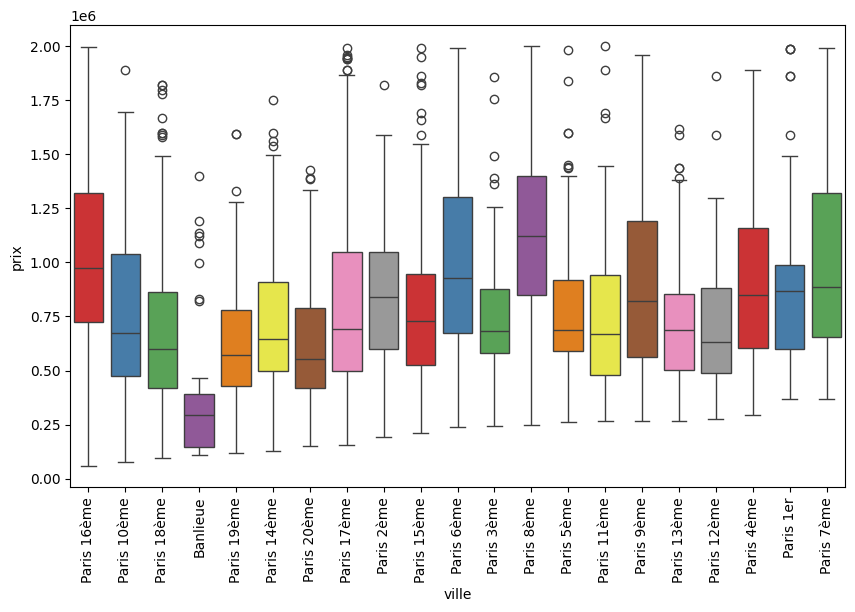

In [43]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(y=dataset['prix'], x=dataset['ville'], hue=dataset['ville'], ax=ax, palette='Set1', legend=False)
ax.tick_params(axis='x', rotation=90)
plt.show()

## Modélisation : étude des déterminants du prix

On va maintenant essayer de comprendre quelles sont les variables les plus déterminantes qui exliquent le prix d'un bien immobilier. Pour ce faire, nous allons utiliser un modèle de régression linéaire. Mais il nous reste encore une étape : transformer les variables catégorielles en variables numériques.

In [44]:
dataset.head()

,idtypecuisine,idtypepublicationsourcecouplage,naturebien,nb_chambres,nb_photos,nb_pieces,position,prix,si_balcon,surface,typedebien,ville
0,équipée,SL,1,2,13,3,11,59000,1,69.00,Appartement,Paris 16ème
1,aucune,SL,1,2,7,1,8,77500,0,8.49,Appartement,Paris 10ème
2,aucune,SL,1,1,8,2,6,94000,0,37.00,Appartement,Paris 18ème
3,aucune,SL,1,2,4,1,16,96000,0,10.26,Appartement,Paris 10ème
4,categorie_0,SL,1,1,5,2,4,100000,0,14.93,Appartement,Paris 16ème


In [45]:
# Transformer les variables catégorielles en variables numériques avec du one-hot encoding il ne reste que des variables numérique
categorical_sub = [
     'typedebien', 'idtypepublicationsourcecouplage',
    'naturebien','idtypecuisine', 'ville'
]


df = pd.get_dummies(dataset, columns = categorical_sub, drop_first=True).astype(int)
df.head()

,nb_chambres,nb_photos,nb_pieces,position,prix,si_balcon,surface,typedebien_Loft/Atelier/Surface,idtypepublicationsourcecouplage_SL,idtypepublicationsourcecouplage_SL9,naturebien_2,naturebien_3,...,ville_Paris 18ème,ville_Paris 19ème,ville_Paris 1er,ville_Paris 20ème,ville_Paris 2ème,ville_Paris 3ème,ville_Paris 4ème,ville_Paris 5ème,ville_Paris 6ème,ville_Paris 7ème,ville_Paris 8ème,ville_Paris 9ème
0,2,13,3,11,59000,1,69,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
1,2,7,1,8,77500,0,8,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
2,1,8,2,6,94000,0,37,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0
3,2,4,1,16,96000,0,10,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
4,1,5,2,4,100000,0,14,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
import statsmodels.api as sm

# Définir la variable dépendante (label) y et les variables explicatives X
y = df['prix']
X = df.drop(['prix'], axis=1)

# Ajouter une constante à la matrice de design X
X = sm.add_constant(X)

# Ajuster un modèle linéaire
model = sm.OLS(y, X).fit()

# Afficher les informations sur le modèle
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   prix   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     430.0
Date:                Fri, 28 Nov 2025   Prob (F-statistic):               0.00
Time:                        12:52:42   Log-Likelihood:                -51461.
No. Observations:                3833   AIC:                         1.030e+05
Df Residuals:                    3792   BIC:                         1.033e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [47]:
# Définir la variable dépendante (label) y et les variables explicatives X
y = df['prix']
X = df.drop(['prix', 'surface'], axis=1) # On enlève la surface des variables explicatives

# Ajouter une constante à la matrice de design X
X = sm.add_constant(X)

# Ajuster un modèle linéaire
model_sub = sm.OLS(y, X).fit()

# Afficher les informations sur le modèle
print(model_sub.summary())

                            OLS Regression Results                            
Dep. Variable:                   prix   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     215.3
Date:                Fri, 28 Nov 2025   Prob (F-statistic):               0.00
Time:                        12:52:42   Log-Likelihood:                -52503.
No. Observations:                3833   AIC:                         1.051e+05
Df Residuals:                    3793   BIC:                         1.053e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [48]:
# Récupérer les p-values sous forme de dictionnaire
pvalues_dict = model.pvalues.to_dict()

pvalues_dict


{'const': 0.02030654192701877,
 'nb_chambres': 0.40154780977161186,
 'nb_photos': 0.3574782226052414,
 'nb_pieces': 0.29711691961541087,
 'position': 0.2751512238321531,
 'si_balcon': 0.0014266317713408647,
 'surface': 0.0,
 'typedebien_Loft/Atelier/Surface': 3.235616711635799e-05,
 'idtypepublicationsourcecouplage_SL': 0.8386671482665933,
 'idtypepublicationsourcecouplage_SL9': 0.4915892142677518,
 'naturebien_2': 0.3706297737353106,
 'naturebien_3': 0.16681054333033177,
 'idtypecuisine_américaine équipée': 0.7726582864151885,
 'idtypecuisine_aucune': 0.7412939916234351,
 'idtypecuisine_categorie_0': 0.9392139900529228,
 'idtypecuisine_categorie_1': 0.7286599891096098,
 'idtypecuisine_coin cuisine': 0.4704468236411856,
 'idtypecuisine_coin cuisine équipé': 0.938809441627076,
 'idtypecuisine_séparée': 0.006549239639699168,
 'idtypecuisine_séparée équipée': 0.5086274943257428,
 'idtypecuisine_équipée': 0.18703136137136653,
 'ville_Paris 10ème': 1.4900190231621615e-91,
 'ville_Paris 11èm

In [49]:
import operator

sorted_pvalues = dict(
    sorted(model.pvalues.items(), key=operator.itemgetter(1))
)

sorted_pvalues


{'surface': 0.0,
 'ville_Paris 6ème': 9.583638280014832e-236,
 'ville_Paris 7ème': 7.912224887107456e-202,
 'ville_Paris 8ème': 5.074024390376331e-189,
 'ville_Paris 16ème': 5.867633453353599e-178,
 'ville_Paris 4ème': 1.108859662447537e-149,
 'ville_Paris 17ème': 5.289694832544168e-140,
 'ville_Paris 5ème': 5.0563788445119115e-136,
 'ville_Paris 15ème': 1.877909117924902e-123,
 'ville_Paris 3ème': 5.662608736393248e-117,
 'ville_Paris 11ème': 4.9761233672162516e-110,
 'ville_Paris 1er': 1.6595049878123105e-107,
 'ville_Paris 9ème': 2.1930204691580073e-107,
 'ville_Paris 18ème': 1.40101291446773e-106,
 'ville_Paris 13ème': 1.9183625378129977e-105,
 'ville_Paris 14ème': 9.052131202351647e-99,
 'ville_Paris 10ème': 1.4900190231621615e-91,
 'ville_Paris 2ème': 5.844918317316066e-89,
 'ville_Paris 12ème': 6.696726750442322e-83,
 'ville_Paris 19ème': 1.7549750097448109e-59,
 'ville_Paris 20ème': 8.519867870882904e-50,
 'typedebien_Loft/Atelier/Surface': 3.235616711635799e-05,
 'si_balcon': 

In [50]:
colonnes = list(dataset.columns)
colonnes

['idtypecuisine',
 'idtypepublicationsourcecouplage',
 'naturebien',
 'nb_chambres',
 'nb_photos',
 'nb_pieces',
 'position',
 'prix',
 'si_balcon',
 'surface',
 'typedebien',
 'ville']

In [51]:
for col in colonnes:
    print("Variable explicative :", col, "   p-value :", pvalues_dict[col])

KeyError: 'idtypecuisine'

In [ ]:
for col in colonnes:
    print("Variable explicative :", col, "   p-value :", pvalues_dict.get(col, "Variable inconnue"))
